In [4]:
!pip install scikit-image

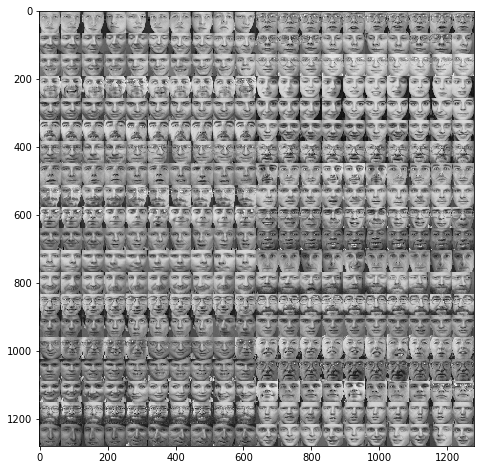

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray
from skimage.util import montage as montage2d

from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

X_vec = np.stack([gray2rgb(iimg) for iimg in faces.data.reshape((-1, 64, 64))], 0)
y_vec = faces.target.astype(np.uint8)

%matplotlib inline
fig, ax1 = plt.subplots(1,1,figsize=(8,8))
ax1.imshow(montage2d(X_vec[:,:,:,0]), cmap='gray', interpolation= 'none')

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, train_size=0.70)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

class PipeStep(object):
  def __init__(self, step_func):
    self._step_func=step_func
  
  def fit(self, *args):
    return self
  def trnsform(self, x):
    return self._step_func(x)
  
makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list])
pipe = Pipeline([
    ('make gray', makegray_step),
    ('flatten Image', flatten_step),
    ('MLP', MLPClassifier(
        activation='relu',
        hidden_layer_sizes=(400,40),
        random_state=42))
])


SyntaxError: ignored

In [9]:
import session
def predict_proba(model_predict, image):
  return session.run(model_predict, feed_dict={"preprocessed_image", image})

ModuleNotFoundError: ignored

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 4.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=9706487abe285ec604bb68e52c6a8a9739480edafbce63f5cadb1a2586e32415
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
